# DSCI 235 Project Final Report

James Ho

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Source: https://github.com/JamesHo-13/DSCI-235-Project-Final-Report/blob/main/CarsData.csv

GitHub: https://github.com/JamesHo-13/DSCI-235-Project-Final-Report

## Project Description

The following dataset was retrieve from kaggle.com and is about a range of cars from 1970 to 2024. This data set interest me because I have always had an interest in cars and would like to learn more about them.

This notebook will answer the following questions:

1.  Which car manufacturer has the most model in the dataset?

*   1a. Which model has the most production year?

2.  Which car manufacturer has the largest engine size?

*   2a. What is the average engine size between manufacturer?
*   2b. What is the relation between engine size and mpg?

3.  Which car manufacturer has the largest price?

*   3a. What is the average price between model?
*   3b. What is the relation between engine size and price?





## Gathering The Data

In [179]:
cardata = pd.read_csv('https://raw.githubusercontent.com/JamesHo-13/DSCI-235-Project-Final-Report/refs/heads/main/CarsData.csv')
cardata = cardata.sort_values(by='model')
cardata = cardata.sort_values(by='Manufacturer')

cardata.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
97422,Q5,2019,35495,Semi-Auto,11000,Petrol,145,32.1,2.0,Audi
75622,A4,2017,19495,Manual,4337,Petrol,145,51.4,1.4,Audi
6061,A4,2017,18300,Automatic,43528,Diesel,30,65.7,2.0,Audi
36275,A4,2017,14849,Manual,58670,Diesel,0,74.3,2.0,Audi
75172,A4,2017,29950,Automatic,21000,Petrol,145,37.7,3.0,Audi


## Cleaning The Data

When cleaning the data, I seperated it into different categories to easily access the variables.

In [180]:
car = cardata[['Manufacturer', 'model', 'year']]
price = cardata[['Manufacturer', 'model', 'year', 'price']]
engine = cardata[['Manufacturer', 'model', 'year', 'engineSize']]

hyundi = cardata.loc[cardata['Manufacturer'] == 'hyundi']
skoda = cardata.loc[cardata['Manufacturer'] == 'skoda']
toyota = cardata.loc[cardata['Manufacturer'] == 'toyota']
audi = cardata.loc[cardata['Manufacturer'] == 'Audi']
bmw = cardata.loc[cardata['Manufacturer'] == 'bmw']
merc = cardata.loc[cardata['Manufacturer'] == 'merc']
vauxhall = cardata.loc[cardata['Manufacturer'] == 'vauxhall']
volkswagen = cardata.loc[cardata['Manufacturer'] == 'volkswagen']
ford = cardata.loc[cardata['Manufacturer'] == 'ford']

## 1.Which car manufacturer has the most model in the dataset?

The first main question I wanted to answer is which manufacturer produced the most models of cars throughout 1970 and 2024. When answering this first question, using a graph will give us a visualization of the amount of cars.

,model
Manufacturer,
hyundi,4774
skoda,6188
toyota,6699
Audi,10565
BMW,10664
merc,12860
vauxhall,13258
volkswagen,14893
ford,17811


<Axes: xlabel='Manufacturer'>

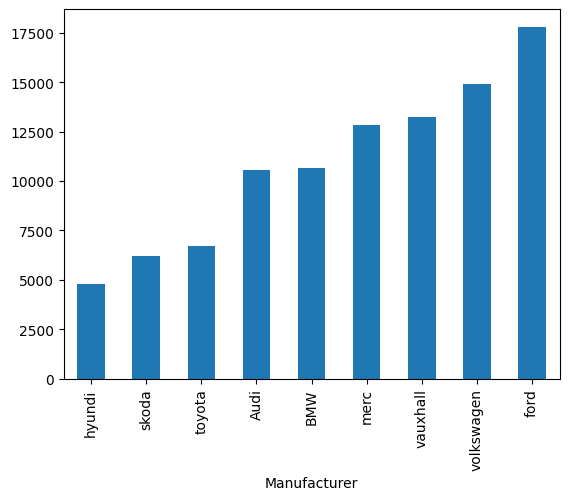

In [181]:
q1 = car.groupby('Manufacturer')['model'].count().sort_values()
display(q1)
q1.plot(kind='bar')

## Conclusion 1

From observing the bar graph, we can see the amount of cars produced in the USA between 1970 and 2024. We can clearly see that Ford has produced the most models of cars.

## 1a. Which model has the most production year?

When answering this question, we are curious to find out which model of each manufancurer produced the most cars during the timeframe.

In [182]:
q1a = car.groupby('model')['year'].count().sort_values()
display(q1a)

,year
model,
A2,1
Accent,1
Amica,1
Escort,1
Transit Tourneo,1
...,...
Corsa,3285
C Class,3694
Focus,4555


## Conclusion 1a

Looking at the output, we see that the Ford Fiesta produced about 6,509 cars during the years 1970 through 2024.

In [183]:
q1b = cardata.groupby('Manufacturer')['transmission'].count()
q1b

,transmission
Manufacturer,
Audi,10565
BMW,10664
ford,17811
hyundi,4774
merc,12860
skoda,6188
toyota,6699
vauxhall,13258
volkswagen,14893


## 2. Which car manufacturer has the largest engine size?

For this question, we are interest in finding which manufacturer has makes the largest engine size. To do this we used the variable engine because it is set with the manufacturer, model, year, and engine size. From then we set the index to manucaturer, model, and year. While sorting by the engine size from highest to lowest.

In [184]:
q2 = engine.set_index(['Manufacturer', 'model', 'year']).sort_values(by='engineSize', ascending=False)
q2

engineSize
Manufacturer model    year            
BMW          7 Series 2017         6.6
                      2017         6.6
Audi         A8       2015         6.3
merc         S Class  2010         6.2
             SL CLASS 2011         6.2
...                                ...
Audi         Q2       2020         0.0
ford         Focus    2018         0.0
volkswagen   Passat   2017         0.0
                      2018         0.0
Audi         Q3       2020         0.0

[97712 rows x 1 columns]

## Conclusion 2

From this we can conclude that the 2017 7 Series from BMW has the largest engine size. Next would be the 2015 A8 from Audi.

## 2a. What is the average engine size between manufacturer?

With this question, we are curious about the average engine size from each manufacturer. To do this we used grouped the manufacturer by engine size then found the mean.

In [185]:
q2a = engine.groupby('Manufacturer')['engineSize'].mean().sort_values()
q2a

,engineSize
Manufacturer,
ford,1.350643
vauxhall,1.419837
skoda,1.434922
hyundi,1.460285
toyota,1.471996
volkswagen,1.600483
Audi,1.932977
merc,2.075381
BMW,2.170161


## Conclusion 2a

From the result we found out that BMW has the largest average for engine size. Although Ford has produced more cars than BMW, because of their lower enging size, it brought the average down. Eventhough BMW was in the median with the amount of cars produced, since it has produced many cars with the largest engine size, it would make sense that they would have the largest average engine size.

## 2b. What is the relation between engine size and mpg?

With this question, we are interested in seeing if having a larger engine size would use up more gas resulting in a lower miles per gallon. To do this, we took the engine size and mpg from each car manufacturer and set them to their own variable. Afterwards we plotted them against eachother to see the relation.

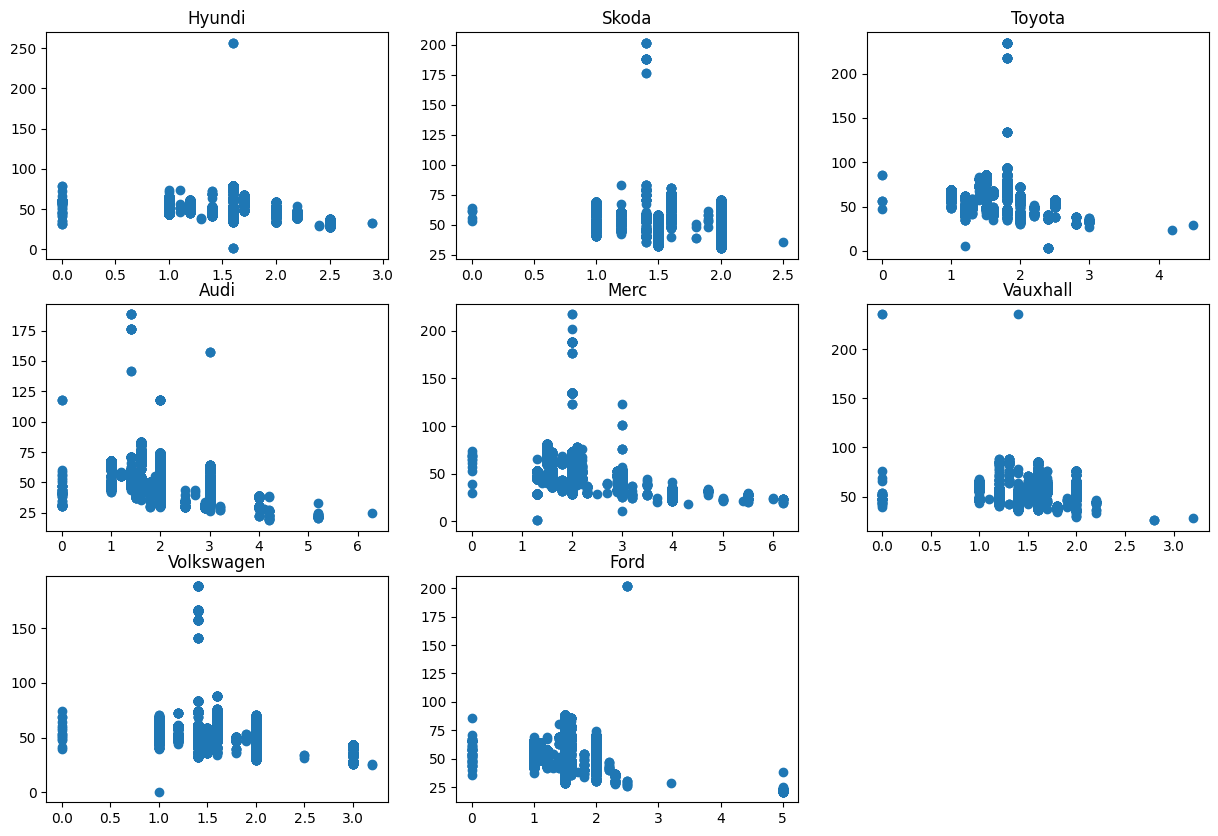

In [186]:
hyundiEngine = hyundi[['engineSize']]
skodaEngine = skoda[['engineSize']]
toyotaEngine = toyota[['engineSize']]
audiEngine = audi[['engineSize']]
mercEngine = merc[['engineSize']]
vauxhallEngine = vauxhall[['engineSize']]
volkswagenEngine = volkswagen[['engineSize']]
fordEngine = ford[['engineSize']]

hyundi_mpg = hyundi[['mpg']]
skoda_mpg = skoda[['mpg']]
toyota_mpg = toyota[['mpg']]
audi_mpg = audi[['mpg']]
merc_mpg = merc[['mpg']]
vauxhall_mpg = vauxhall[['mpg']]
volkswagen_mpge = volkswagen[['mpg']]
ford_mpg = ford[['mpg']]

plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
plt.title('Hyundi')
plt.scatter(hyundiEngine, hyundi_mpg)

plt.subplot(3, 3, 2)
plt.title('Skoda')
plt.scatter(skodaEngine, skoda_mpg)

plt.subplot(3, 3, 3)
plt.title('Toyota')
plt.scatter(toyotaEngine, toyota_mpg)

plt.subplot(3, 3, 4)
plt.title('Audi')
plt.scatter(audiEngine, audi_mpg)

plt.subplot(3, 3, 5)
plt.title('Merc')
plt.scatter(mercEngine, merc_mpg)

plt.subplot(3, 3, 6)
plt.title('Vauxhall')
plt.scatter(vauxhallEngine, vauxhall_mpg)

plt.subplot(3, 3, 7)
plt.title('Volkswagen')
plt.scatter(volkswagenEngine, volkswagen_mpge)

plt.subplot(3, 3, 8)
plt.title('Ford')
plt.scatter(fordEngine, ford_mpg)

## Conclusion 2b

From the graphs, we can see that with an increase in engine size will decrease your miles per gallon. However, this is not all we get from the data. We can also see that a smaller engine size will have a slightly worse miles per gallon than the mid range engine size. This concludes that the best miles per gallon are the engine in the middle of the sizes.

## 3. Which car manufacturer has the largest price?

For this question we are currious about which manufacturer produces the most expessive cars. This is an interesting question because it lets us find out which manufacturer produces the most luxury car. To do this we took the price dataset and set the index to the manufacturer and sorted the values by decending order.

In [187]:
q3 = price.set_index(['Manufacturer']).sort_values(by='price', ascending = False)
display(q3)

,model,year,price
Manufacturer,,,
merc,G Class,2020,159999
merc,G Class,2020,154998
merc,SL CLASS,2011,149948
Audi,R8,2020,145000
merc,A Class,2019,140319
...,...,...,...
vauxhall,Corsa,2003,590
vauxhall,Corsa,2002,495
ford,Focus,2003,495


## Conclusion 3

From this data frame, we can conclude that the 2020 G Class from Merc is the most expensive car on the list. This could then be classified as the most luxury car on the list.

## 3a. What is the average price between model?

For this quesiton, we are curious about the average price of each of the car models.

In [188]:
q3a = price.groupby('model')['price'].mean().sort_values()
display(q3a)

,price
model,
Accent,1295.000000
Vectra,1608.750000
Fox,1733.500000
Amica,1750.000000
Streetka,1924.500000
...,...
Q8,60115.014493
8 Series,63997.794872
X7,69842.763636


## Conclusion 3a

From this data frame we can conclude that on average the G Class was the most expensive car on the list. This shows that that Merc produces the most luxary cars out of all the manufacturer.

## 3b. What is the relation between engine size and price?

For this question we are currious if the engine size would affect the price of the car. To do this we took the engine size and price from each car manufacturer and set them to their own variable. Afterwards we plotted them against eachother to see the relation.

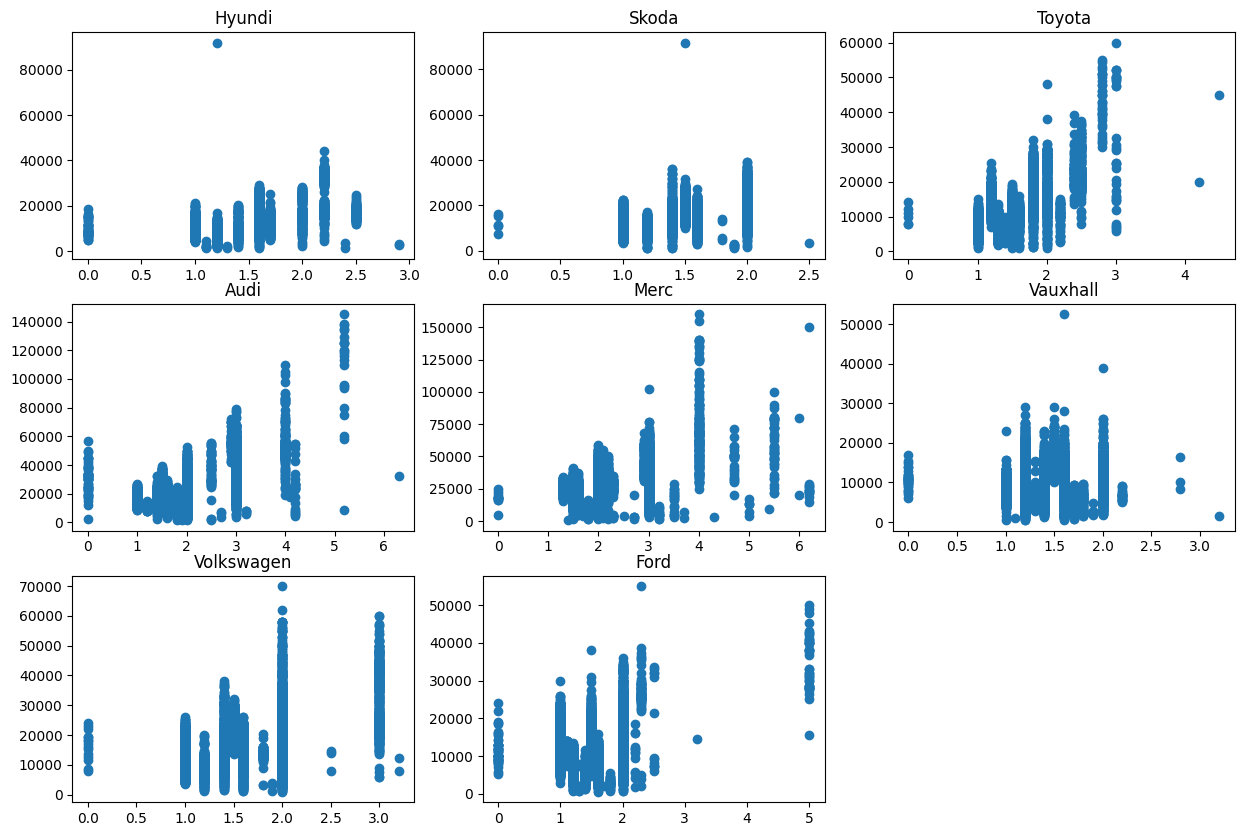

In [189]:
hyundiEngine = hyundi[['engineSize']]
skodaEngine = skoda[['engineSize']]
toyotaEngine = toyota[['engineSize']]
audiEngine = audi[['engineSize']]
mercEngine = merc[['engineSize']]
vauxhallEngine = vauxhall[['engineSize']]
volkswagenEngine = volkswagen[['engineSize']]
fordEngine = ford[['engineSize']]

hyundiPrice = hyundi[['price']]
skodaPrice = skoda[['price']]
toyotaPrice = toyota[['price']]
audiPrice = audi[['price']]
mercPrice = merc[['price']]
vauxhallPrice = vauxhall[['price']]
volkswagenPrice = volkswagen[['price']]
fordPrice = ford[['price']]

plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
plt.title('Hyundi')
plt.scatter(hyundiEngine, hyundiPrice)

plt.subplot(3, 3, 2)
plt.title('Skoda')
plt.scatter(skodaEngine, skodaPrice)

plt.subplot(3, 3, 3)
plt.title('Toyota')
plt.scatter(toyotaEngine, toyotaPrice)

plt.subplot(3, 3, 4)
plt.title('Audi')
plt.scatter(audiEngine, audiPrice)

plt.subplot(3, 3, 5)
plt.title('Merc')
plt.scatter(mercEngine, mercPrice)

plt.subplot(3, 3, 6)
plt.title('Vauxhall')
plt.scatter(vauxhallEngine, vauxhallPrice)

plt.subplot(3, 3, 7)
plt.title('Volkswagen')
plt.scatter(volkswagenEngine, volkswagenPrice)

plt.subplot(3, 3, 8)
plt.title('Ford')
plt.scatter(fordEngine, fordPrice)

## Conclusion 3b

From the plot, we can conclude that engine size does not have much of an effect when it comes to the price. For most manufacture even with a larger engine size, the price still varried from price.

## Conclusion

After answering all of the question, we can conclude:


*   Ford is one of the top producer of cars, with the Ford Fiesta being one of the most popular because of the amount of cars being produced.
*   BMW produces the largest engine size amoung the manufacture with the 7 Series being one of the largest of the list. This means amound the manufacture, BMW will have the worst gas millage.
*   Merc is on the more luxuary side between all of the manufacture, with the G class being the most luxuary because of the price. Eventhough with the high price, that does not mean it will have the largest engine size.

